# Import Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import plotly.express as px

## Read Data 

In [3]:
df_train = pd.read_excel('C:/Users/ASUS/OneDrive/Dokumen/Informatika Semester 7/Lomba/Telco_customer_churn_adapted_v2.xlsx', sheet_name='Sheet1')
df_train

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


## EDA (Exploratory Data Analysis)

Kumpulan data berisi data informasi tentang pelanggan dari sebuah perusahaan telekomunikasi. Data ini mencakup berbagai atribut, termasuk informasi tentang pelanggan, penggunaan layanan, lokasi pelanggan, dan metode pembayaran.

### Deskripsi

In [4]:
# Checknull
df_train.info()
print('Train Data Missing Value ',df_train.isnull().sum().sum())
print('Train Data Duplicate Value ',df_train.duplicated().sum())
# Print jumlah kolom
num_columns = df_train.shape[1]
print(f"Number of columns: {num_columns}")
# Print jumlah baris
num_rows = df_train.shape[0]
print(f"Number of rows: {num_rows}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

In [5]:
#Unique Setiap Kolom
for column in df_train.columns:
    unique_values = df_train[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Customer ID':
[   0    1    2 ... 7040 7041 7042]

Unique values in column 'Tenure Months':
[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]

Unique values in column 'Location':
['Jakarta' 'Bandung']

Unique values in column 'Device Class':
['Mid End' 'High End' 'Low End']

Unique values in column 'Games Product':
['Yes' 'No' 'No internet service']

Unique values in column 'Music Product':
['Yes' 'No' 'No internet service']

Unique values in column 'Education Product':
['No' 'Yes' 'No internet service']

Unique values in column 'Call Center':
['No' 'Yes']

Unique values in column 'Video Product':
['No' 'Yes' 'No internet service']

Unique values in column 'Use MyApp':
['No' 'Yes' 'No internet service']

Unique values in column 'Payment Method':
['Digital Wallet' 'Pulsa' 'Debit' 'Credit']



# Analisis Korelasi Antar Variabel Dalam Dataset

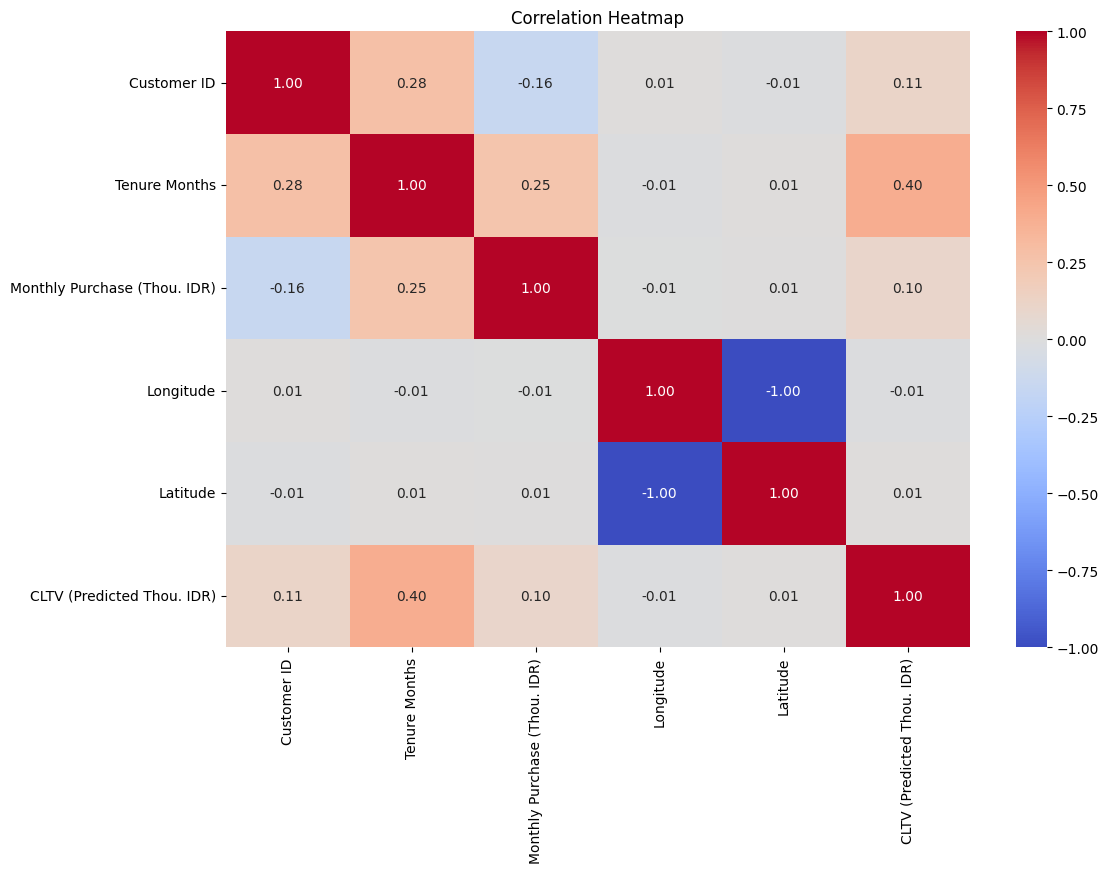

In [6]:
# Menghitung Korelasi matrix
corr_matrix = df_train.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Visualisasi Data

## 1. Analisis Lokasi Pelanggan :
Memeriksa persebaran lokasi pelanggan untuk memahami seberapa banyak pelanggan telah menggunakan layanan.

In [47]:
# Menghitung jumlah pelanggan dari setiap kota
customer_count_by_location = df_train['Location'].value_counts()

# Mendapatkan kota dengan jumlah pelanggan terbanyak
most_subscribed_location = customer_count_by_location.idxmax()

# Mendapatkan jumlah pelanggan dari kota terbanyak
num_customers_most_subscribed = customer_count_by_location.max()

print(f"Kota dengan pelanggan tertinggi yang berlangganan adalah {most_subscribed_location} dengan {num_customers_most_subscribed} pelanggan.")

Kota dengan pelanggan tertinggi yang berlangganan adalah Jakarta dengan 5031 pelanggan.


In [45]:
# Menghitung jumlah pelanggan dari setiap kota
customer_count_by_location = df_train['Location'].value_counts()

# Mendapatkan kota dengan jumlah pelanggan terbanyak
most_subscribed_location = customer_count_by_location.idxmin()

# Mendapatkan jumlah pelanggan dari kota terbanyak
num_customers_most_subscribed = customer_count_by_location.min()

print(f"Kota dengan pelanggan terendah yang berlangganan adalah {most_subscribed_location} dengan {num_customers_most_subscribed} pelanggan.")

Kota dengan pelanggan terendah yang berlangganan adalah Bandung dengan 2012 pelanggan.


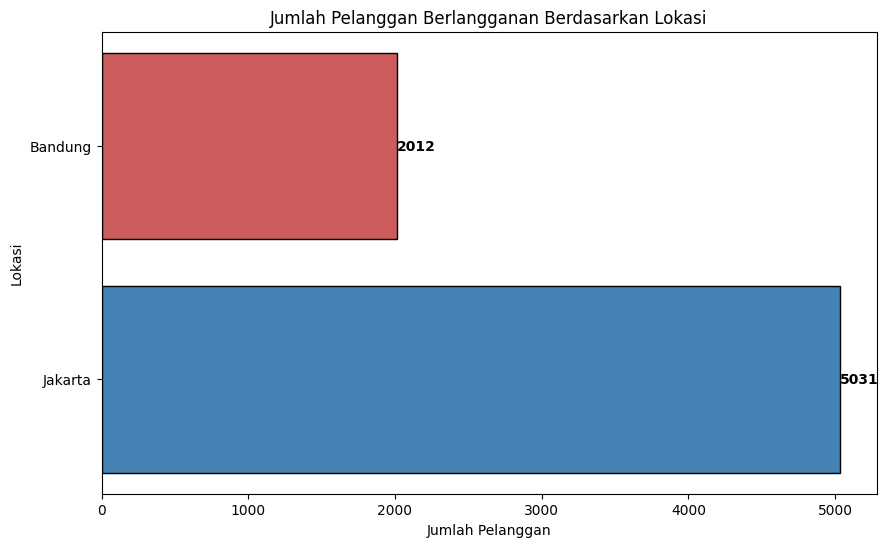

In [70]:
# Menghitung jumlah pelanggan dari setiap kota
customer_count_by_location = df_train['Location'].value_counts()

# Daftar warna yang akan digunakan untuk setiap kota
colors = ['steelblue', 'indianred']

# Membuat grafik batang menyamping
plt.figure(figsize=(10, 6))
bars = plt.barh(customer_count_by_location.index, customer_count_by_location.values, color=colors, edgecolor='black')
plt.title('Jumlah Pelanggan Berlangganan Berdasarkan Lokasi')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Lokasi')

# Menambahkan label jumlah data di ujung batang
for bar in bars:
    yval = bar.get_width()
    plt.text(yval, bar.get_y() + bar.get_height()/2, round(yval), va='center', ha='left', color='black', fontweight='bold')

plt.show()

+ Pola Berlangganan: Jakarta memiliki 5031 pelanggan berlangganan (71.4%), sementara Bandung hanya memiliki 2012 pelanggan (28.6%). Ini bisa menunjukkan bahwa layanan lebih diminati atau memiliki lebih banyak penetrasi pasar di Jakarta.
+ Potensi Pertumbuhan: Jumlah pelanggan di Bandung lebih rendah daripada di Jakarta, menunjukkan ada ruang untuk pertumbuhan di kota tersebut.
+ Fokus Pemasaran: Perusahaan bisa mempertimbangkan strategi pemasaran atau promosi khusus untuk mempertahankan dan meningkatkan pangsa pasar di Jakarta. Di sisi lain, Perusahaan juga dapat mempertimbangkan strategi khusus untuk meningkatkan jumlah pelanggan di Bandung.
+ Perbedaan Demografis atau Ekonomi: Perbedaan jumlah pelanggan mungkin mencerminkan perbedaan dalam karakteristik demografis atau ekonomi antara kedua kota.
+ Feedback Pelanggan: Mengumpulkan umpan balik dari pelanggan di kedua kota akan membantu Perusahaan memahami alasan di balik perbedaan jumlah pelanggan. Mungkin ada faktor-faktor seperti preferensi lokal, perbedaan kebutuhan, atau perbedaan harga yang mempengaruhi.

## 2. Analisis Lama Pelanggan (Tenure Months):
Memeriksa distribusi tenur pelanggan untuk memahami seberapa lama rata-rata pelanggan telah menggunakan layanan.

### Analisis Atribut 'Tenure Months'

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64


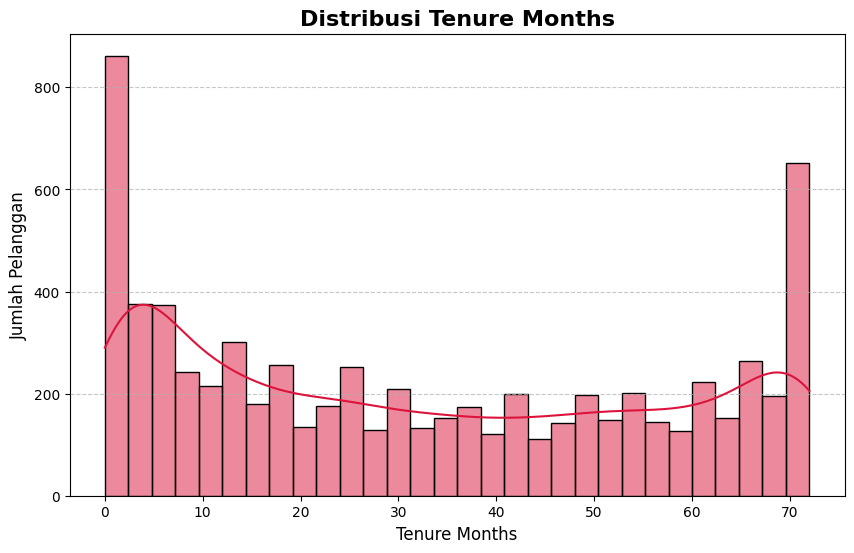

In [48]:
# Memeriksa statistik deskriptif
tenure_stats = df_train['Tenure Months'].describe()
print(tenure_stats)

# Memeriksa distribusi menggunakan histogram
plt.figure(figsize=(10, 6))

sns.histplot(df_train['Tenure Months'], bins=30, kde=True, color='crimson')

# judul dan label sumbu
plt.title('Distribusi Tenure Months', fontsize=16, fontweight='bold')
plt.xlabel('Tenure Months', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

# Mengatur grid untuk plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

+ Count: Jumlah total pengamatan dalam kolom 'Tenure Months' adalah 7043. Ini menunjukkan bahwa terdapat 7043 entri data untuk tenur pelanggan.
+ Mean (Rata-rata): Rata-rata tenur pelanggan adalah sekitar 32.37 bulan. Ini menunjukkan rata-rata umur pelanggan dalam bulan.
+ Std (Standar Deviasi): Standar deviasi adalah sekitar 24.56. Standar deviasi mengukur sebaran data dari rata-rata. Semakin tinggi standar deviasi, semakin besar variabilitas datanya.
+ Min (Minimum): Nilai minimum dari tenur pelanggan adalah 0 bulan. Hal ini menunjukkan bahwa ada pelanggan yang baru mendaftar.
+ 25% (Kuartil Pertama): 25% dari data memiliki tenur kurang dari atau sama dengan 9 bulan. Kuartil pertama adalah batas bawah dari seperempat data terbawah.
+ 50% (Median atau Kuartil Kedua): Nilai tengah dari data adalah 29 bulan. Setengah dari data memiliki tenur kurang dari atau sama dengan 29 bulan.
+ 75% (Kuartil Ketiga): 75% dari data memiliki tenur kurang dari atau sama dengan 55 bulan. Kuartil ketiga adalah batas bawah dari seperempat data teratas.
+ Max (Maksimum): Nilai maksimum dari tenur pelanggan adalah 72 bulan. Ini menunjukkan bahwa ada pelanggan yang telah berlangganan selama 72 bulan, yaitu sekitar 6 tahun.

In [115]:
# Menghitung jumlah pelanggan dengan Tenure Months antara 0-12 bulan
jumlah_pelanggan = ((df_train['Tenure Months'] >= 0) & (df_train['Tenure Months'] <= 12)).sum()

print(f'Jumlah pelanggan dengan Tenure antara 0-12 bulan: {jumlah_pelanggan}')

Jumlah pelanggan dengan Tenure antara 0-12 bulan: 2186


In [120]:
# Menghitung jumlah pelanggan dengan Tenure Months antara 13-24 bulan
jumlah_pelanggan = ((df_train['Tenure Months'] >= 13) & (df_train['Tenure Months'] <= 24)).sum()

print(f'Jumlah pelanggan dengan Tenure antara 13-24 bulan: {jumlah_pelanggan}')

Jumlah pelanggan dengan Tenure antara 13-24 bulan: 1024


In [121]:
# Menghitung jumlah pelanggan dengan Tenure Months antara 25-36 bulan
jumlah_pelanggan = ((df_train['Tenure Months'] >= 25) & (df_train['Tenure Months'] <= 36)).sum()

print(f'Jumlah pelanggan dengan Tenure antara 25-36 bulan: {jumlah_pelanggan}')

Jumlah pelanggan dengan Tenure antara 25-36 bulan: 832


In [123]:
# Menghitung jumlah pelanggan dengan Tenure Months antara 37-48 bulan
jumlah_pelanggan = ((df_train['Tenure Months'] >= 37) & (df_train['Tenure Months'] <= 48)).sum()

print(f'Jumlah pelanggan dengan Tenure antara 37-48 bulan: {jumlah_pelanggan}')

Jumlah pelanggan dengan Tenure antara 37-48 bulan: 762


In [126]:
# Menghitung jumlah pelanggan dengan Tenure Months antara 49-60 bulan
jumlah_pelanggan = ((df_train['Tenure Months'] >= 49) & (df_train['Tenure Months'] <= 60)).sum()

print(f'Jumlah pelanggan dengan Tenure antara 49-60 bulan: {jumlah_pelanggan}')

Jumlah pelanggan dengan Tenure antara 49-60 bulan: 832


In [128]:
# Menghitung jumlah pelanggan dengan Tenure Months antara 61-72 bulan
jumlah_pelanggan = ((df_train['Tenure Months'] >= 61) & (df_train['Tenure Months'] <= 72)).sum()

print(f'Jumlah pelanggan dengan Tenure antara 61-72 bulan: {jumlah_pelanggan}')

Jumlah pelanggan dengan Tenure antara 61-72 bulan: 1407


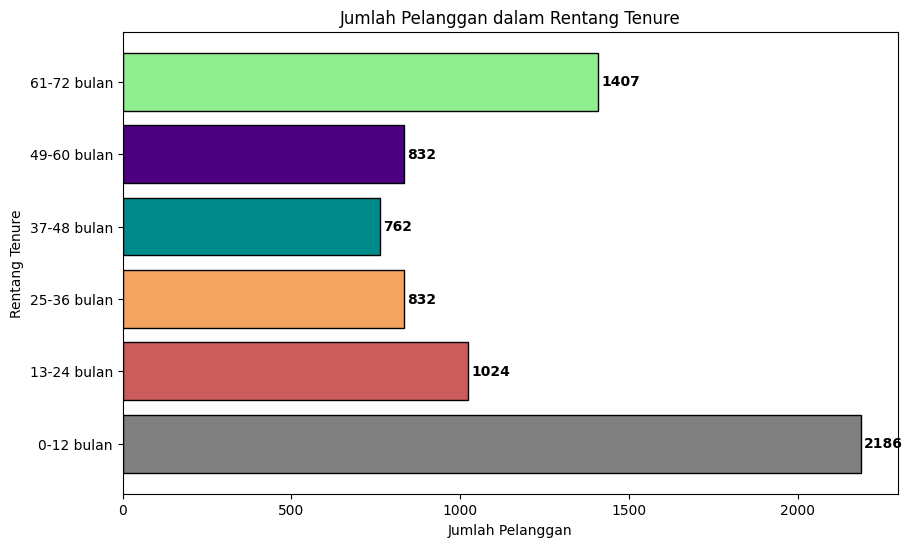

In [141]:
# Data
rentang_tenure = ['0-12 bulan', '13-24 bulan', '25-36 bulan', '37-48 bulan', '49-60 bulan', '61-72 bulan']
jumlah_pelanggan = [2186, 1024, 832, 762, 832, 1407]  

# Warna yang berbeda untuk setiap rentang
colors = ['grey', 'indianred', 'sandybrown', 'darkcyan', 'indigo', 'lightgreen']

# Membuat bar plot dengan orientasi horizontal (menyamping)
plt.figure(figsize=(10, 6))
bars = plt.barh(rentang_tenure, jumlah_pelanggan, color=colors, edgecolor='black')

# Menambahkan garis di sekitar batang
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 10, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center', color='black', fontweight='bold')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Pelanggan dalam Rentang Tenure')
plt.ylabel('Rentang Tenure')
plt.xlabel('Jumlah Pelanggan')

plt.show()


+ Sebagian besar pelanggan adalah pelanggan baru atau relatif baru dalam menggunakan layanan telekomunikasi ini.
+ Ada juga sejumlah pelanggan yang telah menggunakan layanan untuk waktu yang lebih lama, mungkin merupakan pelanggan setia atau yang puas dengan layanan yang diberikan.

## 3. Penggunaan Produk dan Layanan Tambahan:
Mengidentifikasi seberapa banyak pelanggan menggunakan layanan tambahan seperti Games Product, Music Product, Education Product, Call Center, Video Product, dan MyApp.

In [60]:
# Menghitung jumlah pelanggan di masing-masing kategori "High End", "Mid End", dan "Low End"
customer_count_by_device_class = df_train['Device Class'].value_counts()

# Menampilkan hasil
print(customer_count_by_device_class)

High End    3096
Mid End     2421
Low End     1526
Name: Device Class, dtype: int64


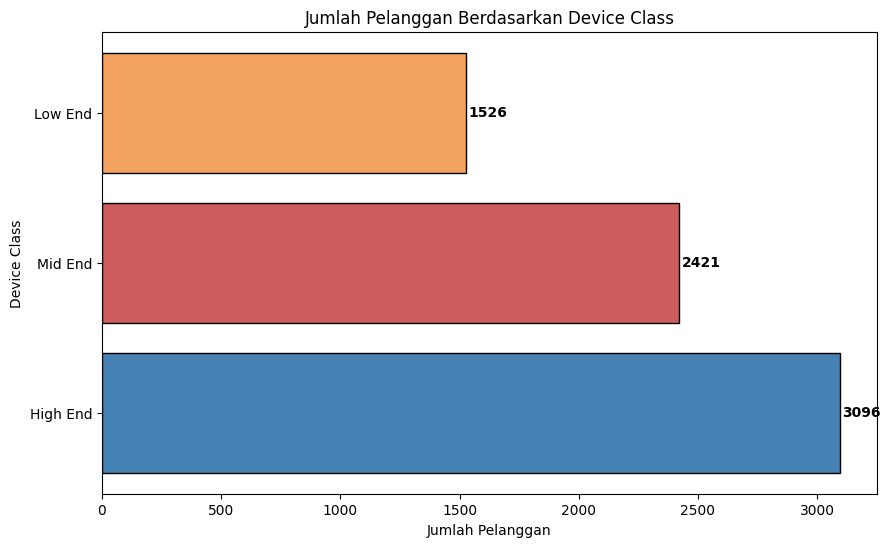

In [71]:
# Menghitung jumlah pelanggan di masing-masing kategori "High End", "Mid End", dan "Low End"
customer_count_by_device_class = df_train['Device Class'].value_counts()

# Daftar warna yang akan digunakan untuk setiap kategori
colors = ['steelblue', 'indianred', 'sandybrown']

# Membuat grafik batang menyamping
plt.figure(figsize=(10, 6))
bars = plt.barh(customer_count_by_device_class.index, customer_count_by_device_class.values, color=colors, edgecolor='black')

# Menambahkan garis di samping batang
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 10, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center', color='black', fontweight='bold')

plt.title('Jumlah Pelanggan Berdasarkan Device Class')
plt.ylabel('Device Class')
plt.xlabel('Jumlah Pelanggan')
plt.show()

+ Visualisasi diatas menunjukkan bahwa sebagian besar pelanggan menggunakan perangkat kelas High End, diikuti oleh kelas Mid End dan Low End.

### Visualisasi High End untuk Penggunaan Layanan

In [18]:
# Filter data untuk kelas perangkat High End
high_end_data = df_train[df_train['Device Class'] == 'High End']

# Menghitung frekuensi penggunaan layanan
games_usage_high = high_end_data['Games Product'].value_counts()
music_usage_high = high_end_data['Music Product'].value_counts()
education_usage_high = high_end_data['Education Product'].value_counts()
call_center_usage_high = high_end_data['Call Center'].value_counts()
video_usage_high = high_end_data['Video Product'].value_counts()
myapp_usage_high = high_end_data['Use MyApp'].value_counts()

print("Penggunaan Games Product:")
print(games_usage_high)

print("\nPenggunaan Music Product:")
print(music_usage_high)

print("\nPenggunaan Education Product:")
print(education_usage_high)

print("\nPenggunaan Call Center:")
print(call_center_usage_high)

print("\nPenggunaan Video Product:")
print(video_usage_high)

print("\nPenggunaan Use MyApp:")
print(myapp_usage_high)


Penggunaan Games Product:
No     2257
Yes     839
Name: Games Product, dtype: int64

Penggunaan Music Product:
No     1753
Yes    1343
Name: Music Product, dtype: int64

Penggunaan Education Product:
No     1739
Yes    1357
Name: Education Product, dtype: int64

Penggunaan Call Center:
No     2230
Yes     866
Name: Call Center, dtype: int64

Penggunaan Video Product:
Yes    1750
No     1346
Name: Video Product, dtype: int64

Penggunaan Use MyApp:
Yes    1751
No     1345
Name: Use MyApp, dtype: int64


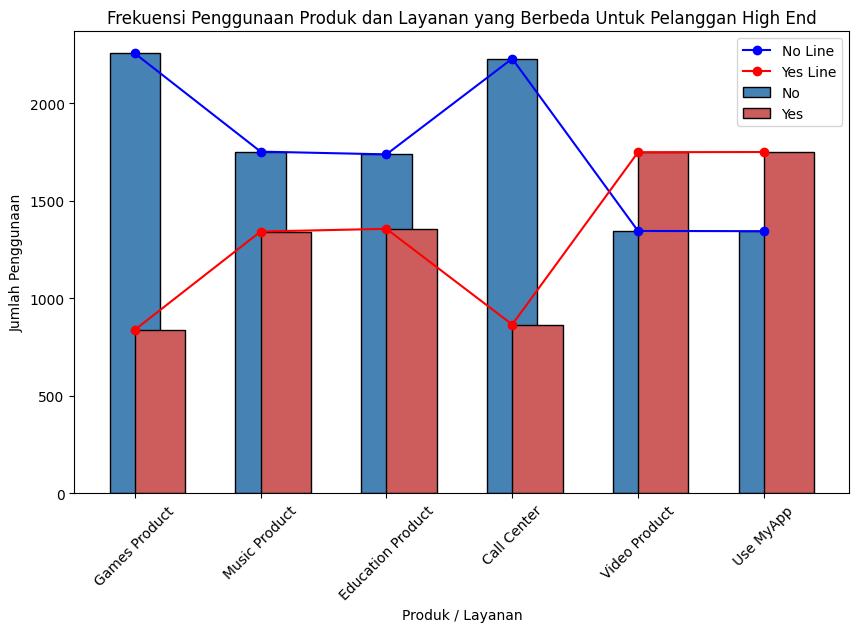

In [76]:
# Data
products = ['Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp']
no_counts = [2257, 1753, 1739, 2230, 1346, 1345]
yes_counts = [839, 1343, 1357, 866, 1750, 1751]

# Menggunakan Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plot kolom untuk 'No'
ax.bar(products, no_counts, width=0.4, align='center', label='No', color='steelblue', edgecolor='black')

# Plot kolom untuk 'Yes'
ax.bar(products, yes_counts, width=0.4, align='edge', label='Yes', color='indianred', edgecolor='black')

# Tambahkan garis untuk 'No'
plt.plot(products, no_counts, marker='o', color='blue', label='No Line')

# Tambahkan garis untuk 'Yes'
plt.plot(products, yes_counts, marker='o', color='red', label='Yes Line')

# Menambah legenda
ax.legend()

# Label dan judul
ax.set_xlabel('Produk / Layanan')
ax.set_ylabel('Jumlah Penggunaan')
ax.set_title('Frekuensi Penggunaan Produk dan Layanan yang Berbeda Untuk Pelanggan High End')

# Memutar label sumbu x
plt.xticks(rotation=45)

# Tampilkan grafik
plt.show()

+ Layanan Games Product kurang diminati oleh pelanggan kelas perangkat High End.
+ Sebagian besar pelanggan kelas perangkat High End menggunakan layanan Music Product, Education Product, Video Product, dan Use MyApp.
+ Layanan Call Center kurang digunakan oleh pelanggan kelas perangkat High End, mungkin karena mereka lebih memilih penggunaan self-service atau bantuan online.

### Visualisasi Mid End untuk Penggunaan Layanan

In [20]:
# Filter data untuk kelas perangkat Mid End
mid_end_data = df_train[df_train['Device Class'] == 'Mid End']

# Menghitung frekuensi penggunaan layanan
games_usage_mid = mid_end_data['Games Product'].value_counts()
music_usage_mid = mid_end_data['Music Product'].value_counts()
education_usage_mid = mid_end_data['Education Product'].value_counts()
call_center_usage_mid = mid_end_data['Call Center'].value_counts()
video_usage_mid = mid_end_data['Video Product'].value_counts()
myapp_usage_mid = mid_end_data['Use MyApp'].value_counts()

print("Penggunaan Games Product:")
print(games_usage_mid)

print("\nPenggunaan Music Product:")
print(music_usage_mid)

print("\nPenggunaan Education Product:")
print(education_usage_mid)

print("\nPenggunaan Call Center:")
print(call_center_usage_mid)

print("\nPenggunaan Video Product:")
print(video_usage_mid)

print("\nPenggunaan Use MyApp:")
print(myapp_usage_mid)


Penggunaan Games Product:
No     1241
Yes    1180
Name: Games Product, dtype: int64

Penggunaan Music Product:
No     1335
Yes    1086
Name: Music Product, dtype: int64

Penggunaan Education Product:
No     1356
Yes    1065
Name: Education Product, dtype: int64

Penggunaan Call Center:
No     1243
Yes    1178
Name: Call Center, dtype: int64

Penggunaan Video Product:
No     1464
Yes     957
Name: Video Product, dtype: int64

Penggunaan Use MyApp:
No     1440
Yes     981
Name: Use MyApp, dtype: int64


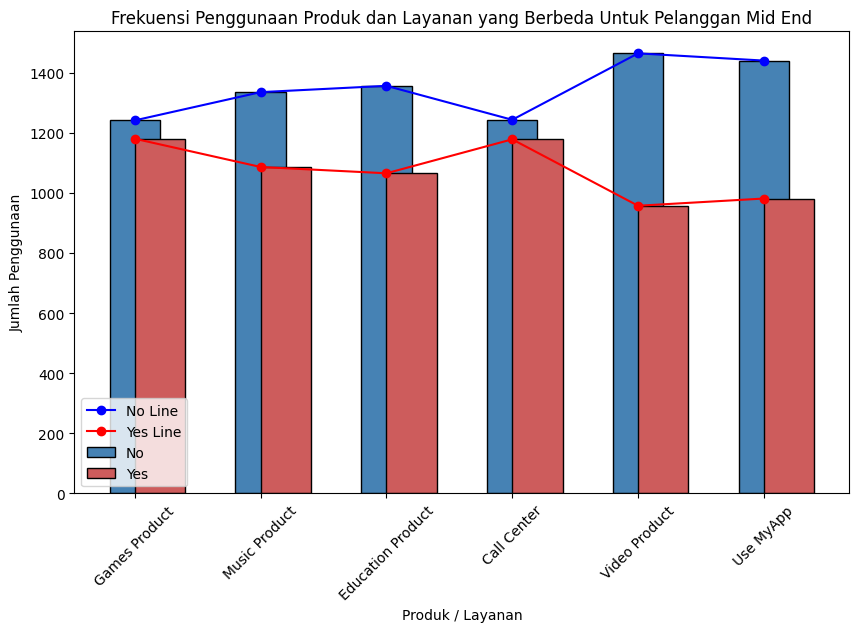

In [77]:
# Data
products = ['Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp']
no_counts = [1241, 1335, 1356, 1243, 1464, 1440]
yes_counts = [1180, 1086, 1065, 1178, 957, 981]

# Menggunakan Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plot kolom untuk 'No'
ax.bar(products, no_counts, width=0.4, align='center', label='No', color='steelblue', edgecolor='black')

# Plot kolom untuk 'Yes'
ax.bar(products, yes_counts, width=0.4, align='edge', label='Yes', color='indianred', edgecolor='black')

# Tambahkan garis untuk 'No'
plt.plot(products, no_counts, marker='o', color='blue', label='No Line')

# Tambahkan garis untuk 'Yes'
plt.plot(products, yes_counts, marker='o', color='red', label='Yes Line')

# Menambah legenda
ax.legend()

# Label dan judul
ax.set_xlabel('Produk / Layanan')
ax.set_ylabel('Jumlah Penggunaan')
ax.set_title('Frekuensi Penggunaan Produk dan Layanan yang Berbeda Untuk Pelanggan Mid End')

# Memutar label sumbu x
plt.xticks(rotation=45)

# Tampilkan grafik
plt.show()

+ Di kategori "Mid End", terlihat bahwa penggunaan berbagai layanan cenderung seragam dengan sebagian besar pelanggan memilih untuk tidak menggunakan beberapa layanan tambahan seperti Music Product, Education Product, dan Call Center.

### Visualisasi Low End untuk Penggunaan Layanan

In [22]:
# Filter data untuk kelas perangkat Low End
low_end_data = df_train[df_train['Device Class'] == 'Low End']

# Menghitung frekuensi penggunaan layanan
games_usage_low = low_end_data['Games Product'].value_counts()
music_usage_low = low_end_data['Music Product'].value_counts()
education_usage_low = low_end_data['Education Product'].value_counts()
call_center_usage_low = low_end_data['Call Center'].value_counts()
video_usage_low = low_end_data['Video Product'].value_counts()
myapp_usage_low = low_end_data['Use MyApp'].value_counts()

print("Penggunaan Games Product:")
print(games_usage_low)

print("\nPenggunaan Music Product:")
print(music_usage_low)

print("\nPenggunaan Education Product:")
print(education_usage_low)

print("\nPenggunaan Call Center:")
print(call_center_usage_low)

print("\nPenggunaan Video Product:")
print(video_usage_low)

print("\nPenggunaan Use MyApp:")
print(myapp_usage_low)

Penggunaan Games Product:
No internet service    1526
Name: Games Product, dtype: int64

Penggunaan Music Product:
No internet service    1526
Name: Music Product, dtype: int64

Penggunaan Education Product:
No internet service    1526
Name: Education Product, dtype: int64

Penggunaan Call Center:
No    1526
Name: Call Center, dtype: int64

Penggunaan Video Product:
No internet service    1526
Name: Video Product, dtype: int64

Penggunaan Use MyApp:
No internet service    1526
Name: Use MyApp, dtype: int64


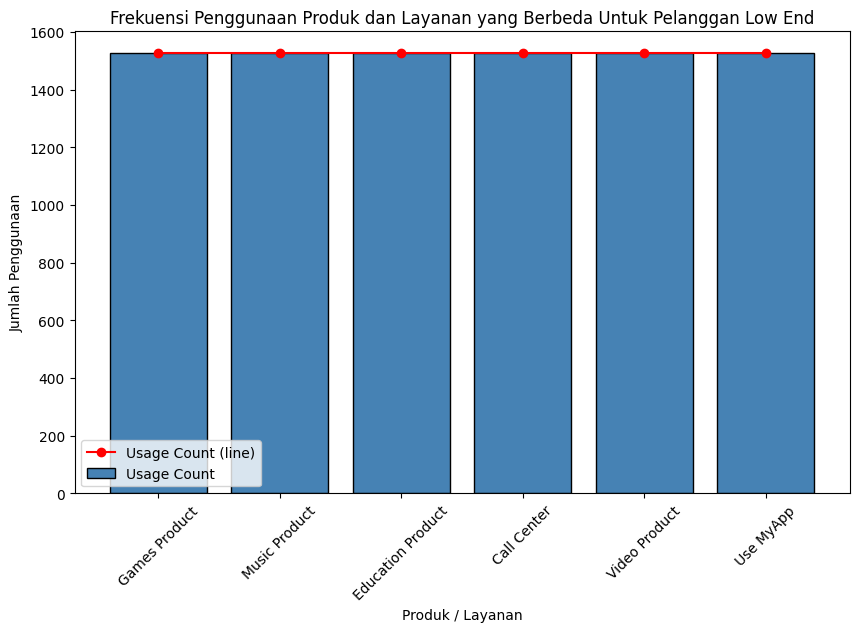

In [78]:
# Data
products = ['Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp']
usage_counts = [1526, 1526, 1526, 1526, 1526, 1526]

# Menggunakan Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plot kolom
ax.bar(products, usage_counts, color='steelblue', label='Usage Count', edgecolor='black')

# Plot garis
ax.plot(products, usage_counts, marker='o', color='red', label='Usage Count (line)')

# Menambah legenda
ax.legend()

# Label dan judul
ax.set_xlabel('Produk / Layanan')
ax.set_ylabel('Jumlah Penggunaan')
ax.set_title('Frekuensi Penggunaan Produk dan Layanan yang Berbeda Untuk Pelanggan Low End')

# Memutar label sumbu x
plt.xticks(rotation=45)

# Tampilkan grafik
plt.show()

+ Berdasarkan output diatas, terlihat bahwa semua layanan (Games Product, Music Product, Education Product, Call Center, Video Product, dan Use MyApp) memiliki catatan "No internet service" sebanyak 1526.

+ Kesimpulan dari data ini adalah bahwa ada 1526 pelanggan kategori "Low End" yang tidak memiliki akses internet untuk menggunakan layanan tersebut. Ini bisa disebabkan oleh berbagai alasan, seperti koneksi internet yang tidak stabil, atau pelanggan memilih untuk tidak menggunakan layanan tambahan yang memerlukan koneksi internet.

+ Jadi, insight yang dapat diambil adalah bahwa sebagian besar pelanggan kategori "Low End" tidak menggunakan layanan tambahan yang membutuhkan koneksi internet. Ini bisa menjadi area untuk mengembangkan layanan yang tidak memerlukan koneksi internet atau untuk meningkatkan akses internet bagi pelanggan kategori "Low End".

## 4. Pengelompokan Berdasarkan Kelas Perangkat (Device Class):
Menganalisis bagaimana penggunaan layanan bervariasi berdasarkan kelas perangkat. Misalnya, apakah pelanggan dengan perangkat kelas atas cenderung menggunakan lebih banyak layanan?

### Melihat Rata-Rata Penggunaan Berbagai Layanan Untuk Setiap Kelas Perangkat

In [24]:
# Memilih kolom untuk dianalisis
analisis_colom = ['Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp', 'Monthly Purchase (Thou. IDR)']

# Menganalisis penggunaan layanan berdasarkan Device Class
device_class_usage = df_train.groupby('Device Class')[analisis_colom].mean()

print(device_class_usage)

              Monthly Purchase (Thou. IDR)
Device Class                              
High End                        118.950168
Low End                          27.402952
Mid End                          75.532819


+ High End: Rata-rata pembelian bulanan untuk pelanggan dengan kelas perangkat tinggi adalah sekitar 118.950.000 Rupiah.
+ Low End: Rata-rata pembelian bulanan untuk pelanggan dengan kelas perangkat rendah adalah sekitar 27.402.000 Rupiah.
+ Mid End: Rata-rata pembelian bulanan untuk pelanggan dengan kelas perangkat menengah adalah sekitar 75.532.000 Rupiah.

+ Jadi, hasil ini memberikan wawasan tentang seberapa banyak pelanggan dalam masing-masing kelas perangkat membelanjakan uang setiap bulan. Pelanggan dengan perangkat kelas atas (High End) cenderung menghabiskan lebih banyak uang dibandingkan dengan pelanggan dengan kelas perangkat lebih rendah.

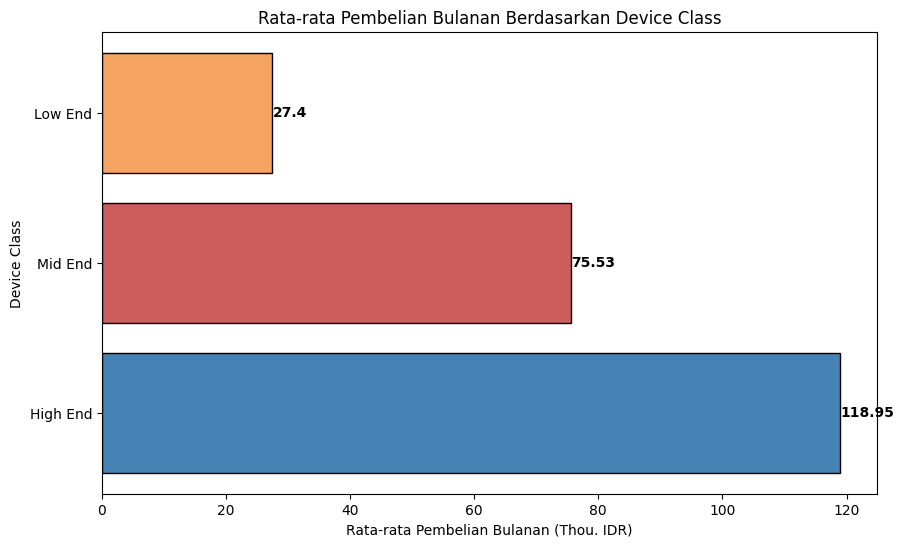

In [79]:
# Data
device_classes = ['High End', 'Low End', 'Mid End']
monthly_purchase = [118.950168, 27.402952, 75.532819]

# Membuat DataFrame
df = pd.DataFrame({'Device Class': device_classes, 'Monthly Purchase (Thou. IDR)': monthly_purchase})

# Mengurutkan DataFrame berdasarkan Monthly Purchase
df = df.sort_values(by='Monthly Purchase (Thou. IDR)', ascending=False)

# Membuat bar plot dengan warna berbeda
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Device Class'], df['Monthly Purchase (Thou. IDR)'], color = ['steelblue', 'indianred', 'sandybrown'], edgecolor='black')

# Menambahkan label di sekitar batang
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.1, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center', color='black', fontweight='bold')

plt.title('Rata-rata Pembelian Bulanan Berdasarkan Device Class')
plt.xlabel('Rata-rata Pembelian Bulanan (Thou. IDR)')
plt.ylabel('Device Class')
plt.show()

## 5. Metode Pembayaran (Payment Method):
Mengetahui metode pembayaran yang paling umum digunakan oleh pelanggan.


### Menghitung Jumlah Penggunaan Setiap Metode Pembayaran

In [26]:
# Menghitung jumlah penggunaan setiap metode pembayaran
payment_method_counts = df_train['Payment Method'].value_counts()

# Menampilkan jumlah penggunaan metode pembayaran
print(payment_method_counts)

Pulsa             2365
Digital Wallet    1612
Debit             1544
Credit            1522
Name: Payment Method, dtype: int64


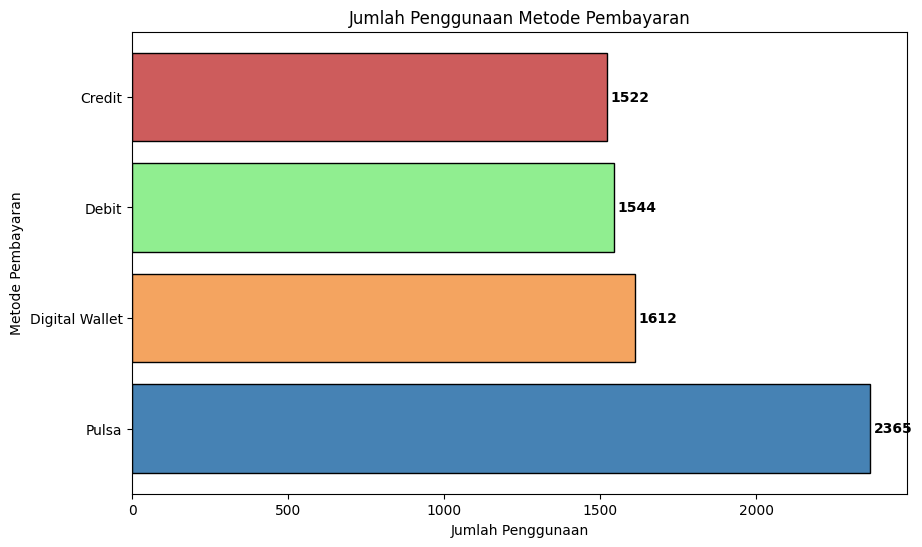

In [82]:
# Menghitung jumlah penggunaan setiap metode pembayaran
payment_method_counts = df_train['Payment Method'].value_counts()

# Membuat bar plot menyamping
plt.figure(figsize=(10, 6))
bars = plt.barh(payment_method_counts.index, payment_method_counts.values, color=['steelblue', 'sandybrown', 'lightgreen', 'indianred'], edgecolor='black')

# Menambahkan label di sebelah kanan batang
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 10, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center', ha='left', color='black', fontweight='bold')

plt.title('Jumlah Penggunaan Metode Pembayaran')
plt.xlabel('Jumlah Penggunaan')
plt.ylabel('Metode Pembayaran')
plt.show()

+ Metode pembayaran "Pulsa" memiliki penggunaan tertinggi, dengan jumlah penggunaan sebanyak 2365.
+ Kemudian, diikuti oleh "Debit" dengan 1544 penggunaan, "Credit" dengan 1522 penggunaan, dan "Digital Wallet" dengan 1612 penggunaan.

+ Insight yang dapat diambil adalah bahwa mayoritas pelanggan lebih memilih untuk melakukan pembayaran dengan menggunakan metode "Pulsa". Selanjutnya, metode pembayaran "Digital Wallet", "Debit", dan "Credit" memiliki penggunaan yang hampir seimbang.

+ Sarankan untuk terus memantau tren penggunaan metode pembayaran ini dan mungkin melakukan promosi atau insentif untuk mendorong penggunaan metode pembayaran tertentu.

## 6. Analisis Belanja Bulanan (Monthly Purchase):
Menganalisis distribusi pengeluaran bulanan pelanggan.

### Analisis Terhadap Kolom "Monthly Purchase (Thou. IDR)"
Kolom ini merupakan pengeluaran bulanan dalam satuan ribuan Rupiah.

count    7043.000000
mean       84.190200
std        39.117061
min        23.725000
25%        46.150000
50%        91.455000
75%       116.805000
max       154.375000
Name: Monthly Purchase (Thou. IDR), dtype: float64


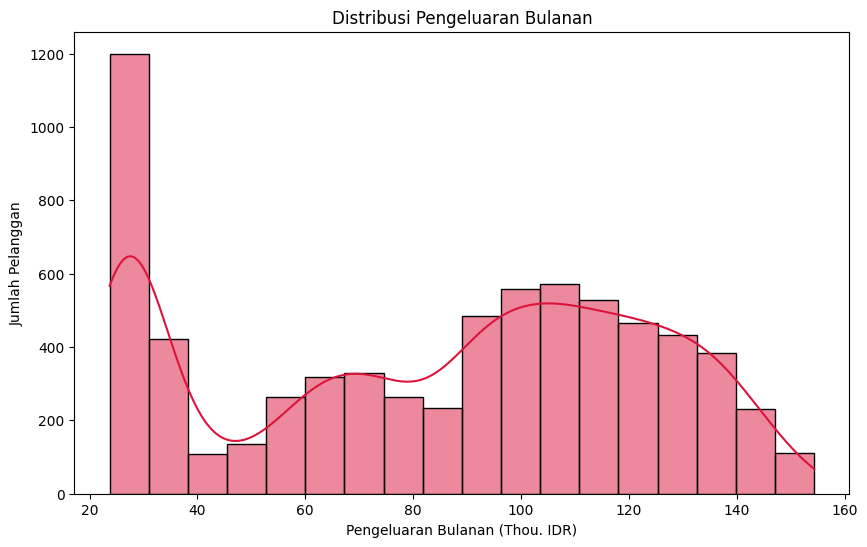

In [85]:
# Memeriksa statistik deskriptif
monthly_purchase_stats = df_train['Monthly Purchase (Thou. IDR)'].describe()
print(monthly_purchase_stats)

# Memeriksa distribusi menggunakan KDE dengan Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Monthly Purchase (Thou. IDR)'], kde=True, color='crimson')
plt.title('Distribusi Pengeluaran Bulanan')
plt.xlabel('Pengeluaran Bulanan (Thou. IDR)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

+ count: Jumlah total data yang ada dalam kolom, dalam hal ini ada 7043 data pelanggan.
+ mean: Rata-rata dari semua nilai pengeluaran bulanan pelanggan adalah sekitar 84.19 ribu Rupiah.
+ std: Standar deviasi adalah sekitar 39.12 ribu Rupiah. Standar deviasi mengukur sejauh mana nilai-nilai pengeluaran bulanan menyebar dari rata-rata.
+ min: Nilai terkecil dari pengeluaran bulanan adalah sekitar 23.73 ribu Rupiah.
+ 25%: Kuartil pertama (Q1) adalah sekitar 46.15 ribu Rupiah. Ini menunjukkan bahwa 25% dari pelanggan memiliki pengeluaran bulanan kurang dari atau sama dengan 46.15 ribu Rupiah.
+ 50%: Median (Q2) adalah sekitar 91.46 ribu Rupiah. Ini adalah nilai tengah dari semua pengeluaran bulanan.
+ 75%: Kuartil ketiga (Q3) adalah sekitar 116.81 ribu Rupiah. Ini menunjukkan bahwa 75% dari pelanggan memiliki pengeluaran bulanan kurang dari atau sama dengan 116.81 ribu Rupiah.
+ max: Nilai tertinggi dari pengeluaran bulanan adalah sekitar 154.38 ribu Rupiah.

Insight yang dapat diambil dari statistik ini adalah distribusi dan sebaran pengeluaran bulanan pelanggan. Rata-rata pengeluaran bulanan adalah sekitar 84 ribu Rupiah, namun sebarannya cukup besar dengan standar deviasi sekitar 39 ribu Rupiah. Ini menunjukkan variasi yang signifikan dalam pengeluaran bulanan pelanggan. Ada pelanggan dengan pengeluaran rendah (minimum 23.73 ribu Rupiah) hingga pelanggan dengan pengeluaran tinggi (maksimum 154.38 ribu Rupiah).

## 7. Analisis Churn:
Mengetahui seberapa banyak pelanggan yang meninggalkan perusahaan (Churn Label) selama periode tertentu.

In [29]:
# Menghitung jumlah pelanggan yang churn
churn_count = df_train['Churn Label'].value_counts()

# Menghitung persentase churn
churn_percentage = (churn_count / len(df_train)) * 100

print("Jumlah Churn:")
print(churn_count)
print("\nPersentase Churn:")
print(churn_percentage)

Jumlah Churn:
No     5174
Yes    1869
Name: Churn Label, dtype: int64

Persentase Churn:
No     73.463013
Yes    26.536987
Name: Churn Label, dtype: float64


+ Jumlah Churn: Dari total pelanggan yang diamati, terdapat 1.869 pelanggan yang meninggalkan perusahaan (Churn Label: Yes) dan 5.174 pelanggan yang tetap menggunakan layanan (Churn Label: No).

+ Persentase Churn: Sekitar 26.54% dari total pelanggan meninggalkan perusahaan, sementara 73.46% tetap menggunakan layanan. Hal ini menunjukkan bahwa tingkat churn (perpindahan pelanggan) cukup signifikan.

+ Implikasi Bisnis: Tingkat churn yang tinggi dapat berdampak negatif pada bisnis, karena perusahaan perlu menghabiskan sumber daya untuk mendapatkan pelanggan baru dan meningkatkan retensi pelanggan. Penting untuk menganalisis faktor-faktor yang mungkin mempengaruhi churn dan mengambil tindakan untuk meminimalkannya.

+ Strategi Retensi: Perusahaan perlu mempertimbangkan strategi untuk meningkatkan retensi pelanggan, seperti meningkatkan kualitas layanan, memberikan insentif atau promosi khusus untuk pelanggan setia, dan memahami penyebab churn untuk dapat mengambil tindakan yang tepat.

+ Pemantauan dan Analisis Lanjutan: Analisis ini dapat menjadi awal untuk memahami churn, namun diperlukan analisis lebih lanjut untuk mengidentifikasi faktor-faktor spesifik yang mempengaruhi keputusan pelanggan untuk berpindah.

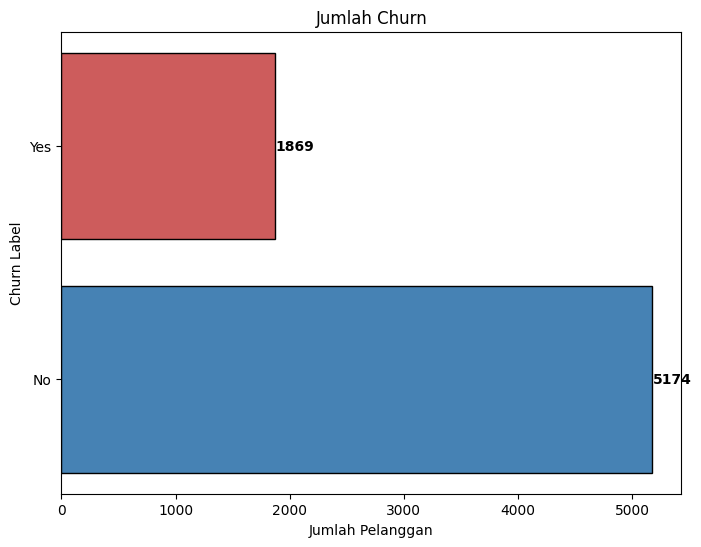

In [91]:
# Data
churn_labels = ['No', 'Yes']
jumlah_pelanggan = [5174, 1869]

# Membuat bar plot
plt.figure(figsize=(8, 6))
bars = plt.barh(churn_labels, jumlah_pelanggan, color=['steelblue', 'indianred'], edgecolor='black')

# Menambahkan label di samping masing-masing bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='left', color='black', fontweight='bold')

plt.title('Jumlah Churn')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Churn Label')
plt.show()

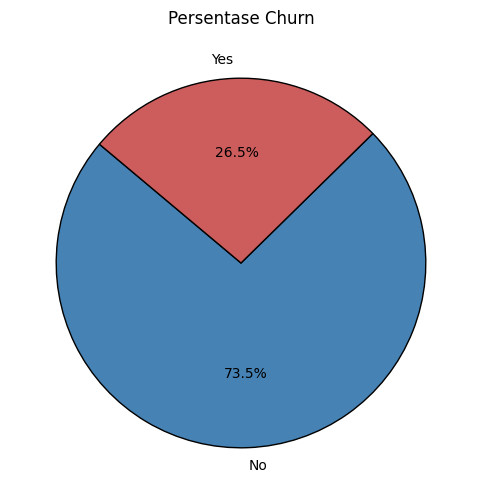

In [93]:
# Data
labels = ['No', 'Yes']
persentase = [73.463013, 26.536987]

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(persentase, labels=labels, autopct='%1.1f%%', colors=['steelblue', 'indianred'], startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Persentase Churn')
plt.show()

In [31]:
churn_by_device_class = df_train.groupby('Device Class')['Churn Label'].value_counts().unstack()
print(churn_by_device_class)

Churn Label     No   Yes
Device Class            
High End      1799  1297
Low End       1413   113
Mid End       1962   459


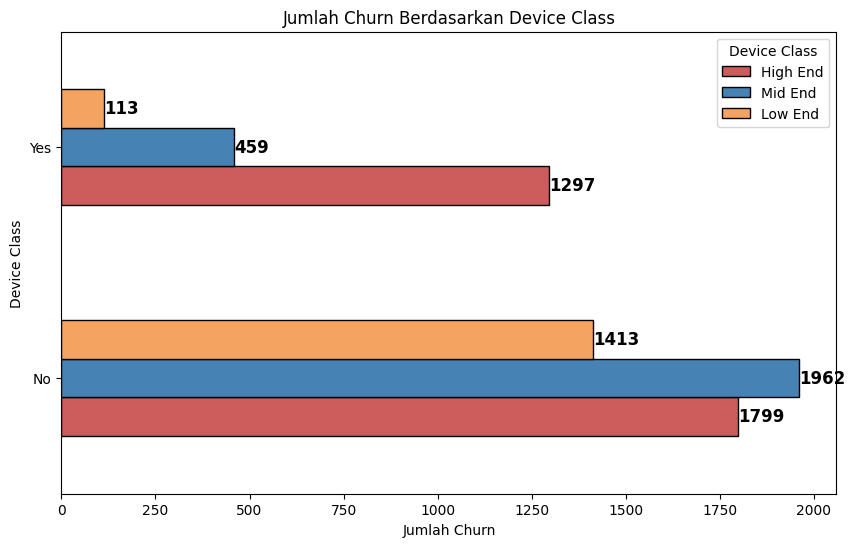

In [100]:
# Data
churn_data = {
    'Churn Label': ['No', 'Yes'],
    'High End': [1799, 1297],
    'Mid End': [1962, 459],
    'Low End': [1413, 113]
}

# Membuat DataFrame dari data
import pandas as pd
df = pd.DataFrame(churn_data)
df.set_index('Churn Label', inplace=True)

# Membuat bar plot menyamping
ax = df.plot(kind='barh', figsize=(10, 6), color=['indianred', 'steelblue', 'sandybrown'], edgecolor= 'black')
plt.title('Jumlah Churn Berdasarkan Device Class')
plt.xlabel('Jumlah Churn')
plt.ylabel('Device Class')
plt.xticks(rotation=0)

# Menambahkan garis di sekitar batang
for i, container in enumerate(ax.containers):
    ax.bar_label(container, fmt='%d', color='black', fontsize=12, fontweight='bold')

# Menambahkan legenda
plt.legend(title='Device Class')

plt.show()

##### 1. Churn Berdasarkan Kelas Perangkat:

+ High End: Terdapat 1.799 pelanggan yang tetap menggunakan layanan dan 1.297 pelanggan yang meninggalkan perusahaan.
+ Low End: Terdapat 1.413 pelanggan yang tetap menggunakan layanan dan hanya 113 pelanggan yang meninggalkan perusahaan.
+ Mid End: Terdapat 1.962 pelanggan yang tetap menggunakan layanan dan 459 pelanggan yang meninggalkan perusahaan.

##### 2. Tingkat Churn Relatif:

+ Tingkat churn pada pelanggan High End dan Mid End lebih tinggi dibandingkan dengan pelanggan Low End. Ini mungkin menunjukkan bahwa pelanggan dengan perangkat kelas atas cenderung lebih mungkin untuk berpindah.

##### 3. Pentingnya Retensi Pelanggan pada Kelas Perangkat Tinggi:

+ Perusahaan perlu memperhatikan retensi pelanggan pada kelas perangkat High End dan Mid End karena jumlah pelanggan yang meninggalkan perusahaan relatif tinggi.

##### 4. Potensi Fokus Retensi pada Low End:

+ Meskipun churn pada Low End lebih rendah secara relatif, perusahaan masih harus mempertahankan pelanggan di segmen ini, karena jumlahnya yang signifikan.

##### 5. Strategi Retensi Diperlukan:

+ Perusahaan mungkin perlu mengimplementasikan strategi retensi yang berbeda untuk setiap kelas perangkat, dengan mempertimbangkan preferensi dan kebutuhan pelanggan di masing-masing segmen.

##### 6. Analisis Lanjutan Diperlukan:

+ Meskipun analisis ini memberikan wawasan awal, akan lebih baik jika dilakukan analisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhi keputusan pelanggan untuk berpindah di setiap kelas perangkat.

## 8. Analisis Nilai Hidup Pelanggan (CLTV):
Memahami distribusi nilai hidup pelanggan. Ini adalah metrik penting dalam menilai seberapa berharga setiap pelanggan bagi perusahaan.

In [32]:
cltv_stats = df_train['CLTV (Predicted Thou. IDR)'].describe()
print(cltv_stats)

count    7043.000000
mean     5720.384481
std      1537.974298
min      2603.900000
25%      4509.700000
50%      5885.100000
75%      6994.650000
max      8450.000000
Name: CLTV (Predicted Thou. IDR), dtype: float64


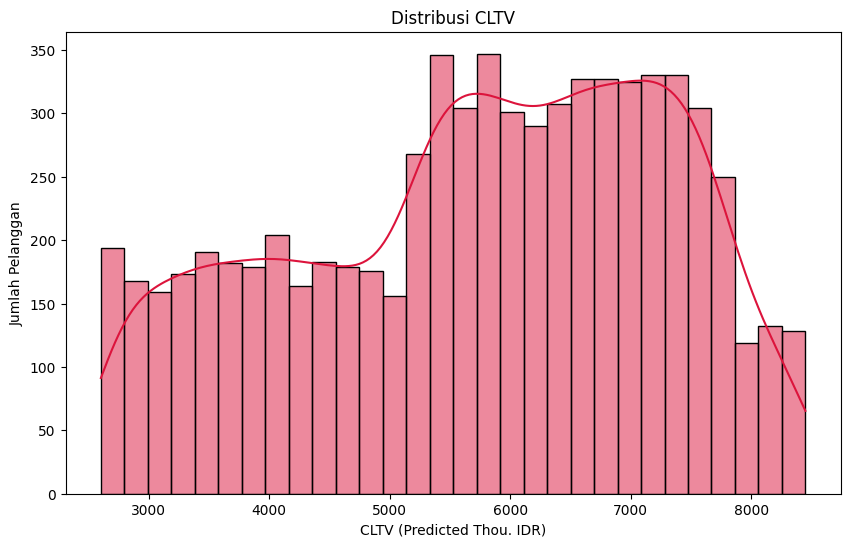

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['CLTV (Predicted Thou. IDR)'], bins=30, color='crimson', kde=True)
plt.title('Distribusi CLTV')
plt.xlabel('CLTV (Predicted Thou. IDR)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

+ Rata-rata CLTV: Rata-rata CLTV adalah sekitar 5720,38. Ini menunjukkan nilai rata-rata dari seberapa berharga setiap pelanggan bagi perusahaan dalam ribuan IDR.
+ Rentang CLTV: CLTV berkisar dari 2603,9 hingga 8450, yang menunjukkan variasi dalam nilai berapa banyak setiap pelanggan dihargai oleh perusahaan.
+ Standar Deviasi CLTV: Standar deviasi sekitar 1537,97. Standar deviasi yang tinggi menunjukkan bahwa nilai CLTV cenderung tersebar jauh dari rata-rata.
+ Kuartil: Kuartil 25% (Q1) berada di 4509,7, kuartil 50% (median atau Q2) adalah 5885,1, dan kuartil 75% (Q3) adalah 6994,65. Ini memberi kita gambaran tentang distribusi CLTV secara lebih detail.
+ Jumlah Data: Total ada 7043 data dalam dataset.

In [34]:
cltv_std_dev = df_train['CLTV (Predicted Thou. IDR)'].std()
cltv_median = df_train['CLTV (Predicted Thou. IDR)'].median()
cltv_q3 = df_train['CLTV (Predicted Thou. IDR)'].quantile(0.75)

print(f'Standard Deviation: {cltv_std_dev}')
print(f'Median: {cltv_median}')
print(f'Q3 (75th percentile): {cltv_q3}')

Standard Deviation: 1537.9742975382758
Median: 5885.1
Q3 (75th percentile): 6994.65


+ Standard Deviation (Deviasi Standar): Nilai deviasi standar sekitar 1537.97. Hal ini mengindikasikan sejauh mana data poin individual tersebar dari rata-rata. Semakin tinggi deviasi standar, semakin besar variabilitas data.

+ Median: Median CLTV adalah 5885.1. Median adalah nilai tengah dari distribusi data dan memberikan gambaran tentang "nilai tengah" dari CLTV.

+ Q3 (Kuartil ke-3): Nilai kuartil ke-3, juga dikenal sebagai kuartil ke-3 atau persentil ke-75, adalah 6994.65. Kuartil ke-3 memisahkan data teratas 25% dari data yang tersedia. Ini memberikan gambaran tentang seberapa besar nilai CLTV untuk 25% pelanggan teratas.

+ Data CLTV tersebut memiliki deviasi standar yang relatif besar, menunjukkan variasi yang signifikan dalam nilai CLTV. Median (nilai tengah) adalah 5885.1, menunjukkan bahwa setengah dari pelanggan memiliki CLTV kurang dari nilai ini. Kuartil ke-3 (6994.65) menunjukkan bahwa 75% dari data memiliki nilai CLTV kurang dari 6994.65.

In [35]:
print(df_train.columns)

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')
